# Exploring a dictionary-based approach with Empath

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/words-as-images/blob/main/dictionary-based-approach.ipynb).


In [1]:
## Uncomment the below lines if needed.
# !pip install pandas
# !pip install seaborn
# !pip install empath
# !pip install vaderSentiment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from empath import Empath
lexicon = Empath()

In [3]:
with open('./data/carroll-alice.txt', 'r', encoding='utf-8-sig') as fo :
    alice = fo.readlines()

alice=alice[28:]
alice = [text.replace('\n', '') for text in alice]
alice = [text for text in alice if len(text) > 0]

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command.

In [4]:
lexicon.cats.keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

To analyze a piece of text using this category, use the following function.

In [5]:
alice_text = ' '.join(alice)
results = lexicon.analyze(alice_text, normalize=True)
sns.set_theme('paper', font_scale=0.6)
sns.set_style('white')
plt.figure(figsize=(3,30), dpi=150)
# sns.barplot(results, orient='h')

<Figure size 450x4500 with 0 Axes>

<Figure size 450x4500 with 0 Axes>

## Analysing a piece of text using Empath


Let's first create a dataframe so we can add any computed metrics alongside each unit of text, like paragraphs

In [6]:
alice_df = pd.DataFrame({'text' : alice})
alice_df[0:10]

,text
0,Alice was beginning to get very tired of sitti...
1,"bank, and of having nothing to do: once or twi..."
2,"the book her sister was reading, but it had no..."
3,"conversations in it, “and what is the use of a..."
4,“without pictures or conversations?”
5,So she was considering in her own mind (as wel...
6,"hot day made her feel very sleepy and stupid),..."
7,making a daisy-chain would be worth the troubl...
8,"picking the daisies, when suddenly a White Rab..."
9,close by her.


We can create a function for this approach so that we can pass this function to the dataframe.

In [7]:
def calc_childish(text):
    category = 'childish'
    score = lexicon.analyze(text, categories=[category], normalize=False)
    # print(score)
    return score[category]

alice_df['childish'] = alice_df['text'].apply(calc_childish)
                                                                
alice_df.sample(5)                                                                               

,text,childish
581,"now? That’ll be a comfort, one way—never to be...",0.0
669,"must make me smaller, I suppose.”",0.0
2223,"Here the other guinea-pig cheered, and was sup...",0.0
1520,"“No, I didn’t,” said Alice: “I don’t think it’...",0.0
1086,"The baby grunted again, and Alice looked very ...",0.0


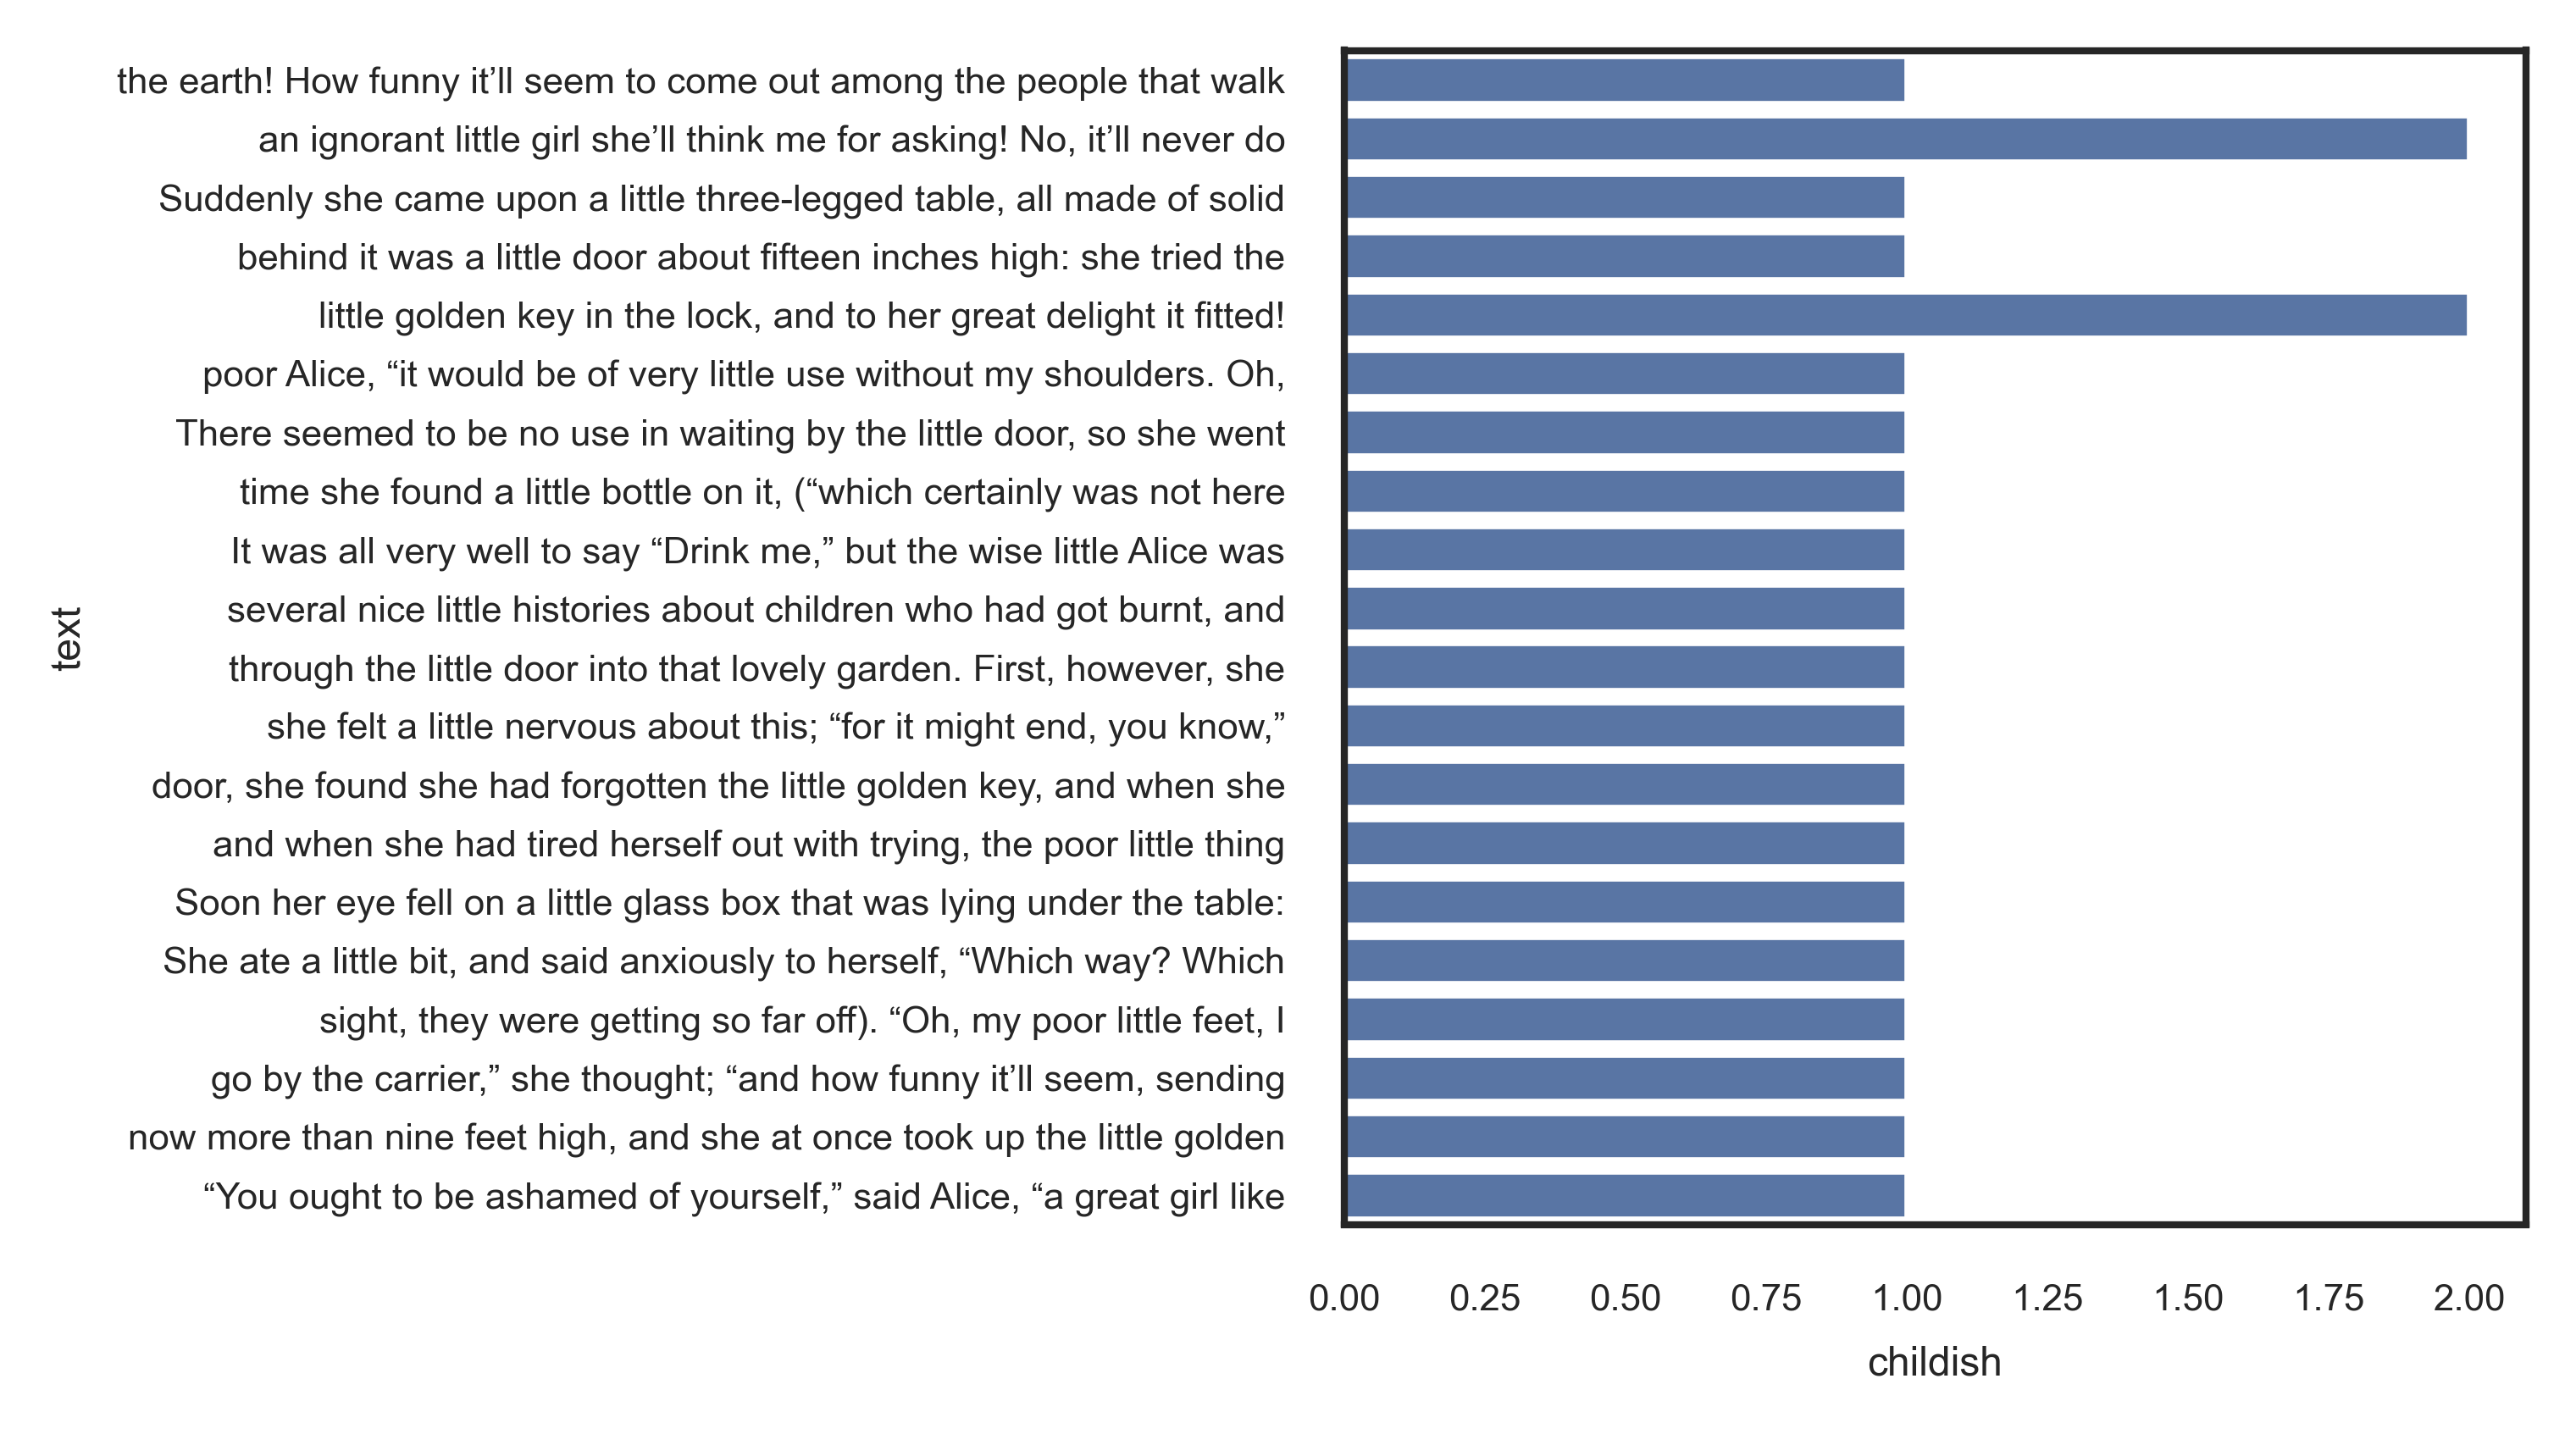

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3),dpi=600)
childish_text_df = alice_df[alice_df['childish'] > 0]
g = sns.barplot(data = childish_text_df[0:20], x='childish', y='text')
# g = g.set_yticklabels([])


## A similar approach for sentiment analysis

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [11]:
alice_df['sentiment'] = alice_df['text'].apply(sentiment)
alice_df.sample(3)

,text,childish,sentiment
1416,"went nearer to watch them, and just as she cam...",0.0,0.0000
1344,repeated her question. “Why did they live at t...,0.0,0.0000
2009,"And will talk in contemptuous tones of the Shark,",0.0,-0.4939


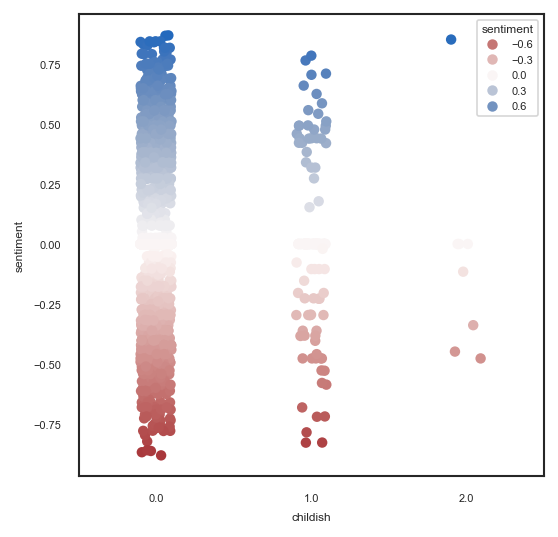

In [12]:
plt.figure(figsize=(4,4),dpi=150)
g = sns.stripplot(data=alice_df, x="childish", y="sentiment", hue='sentiment', palette=sns.color_palette("vlag_r", as_cmap=True))

<Axes: xlabel='sentiment', ylabel='text'>

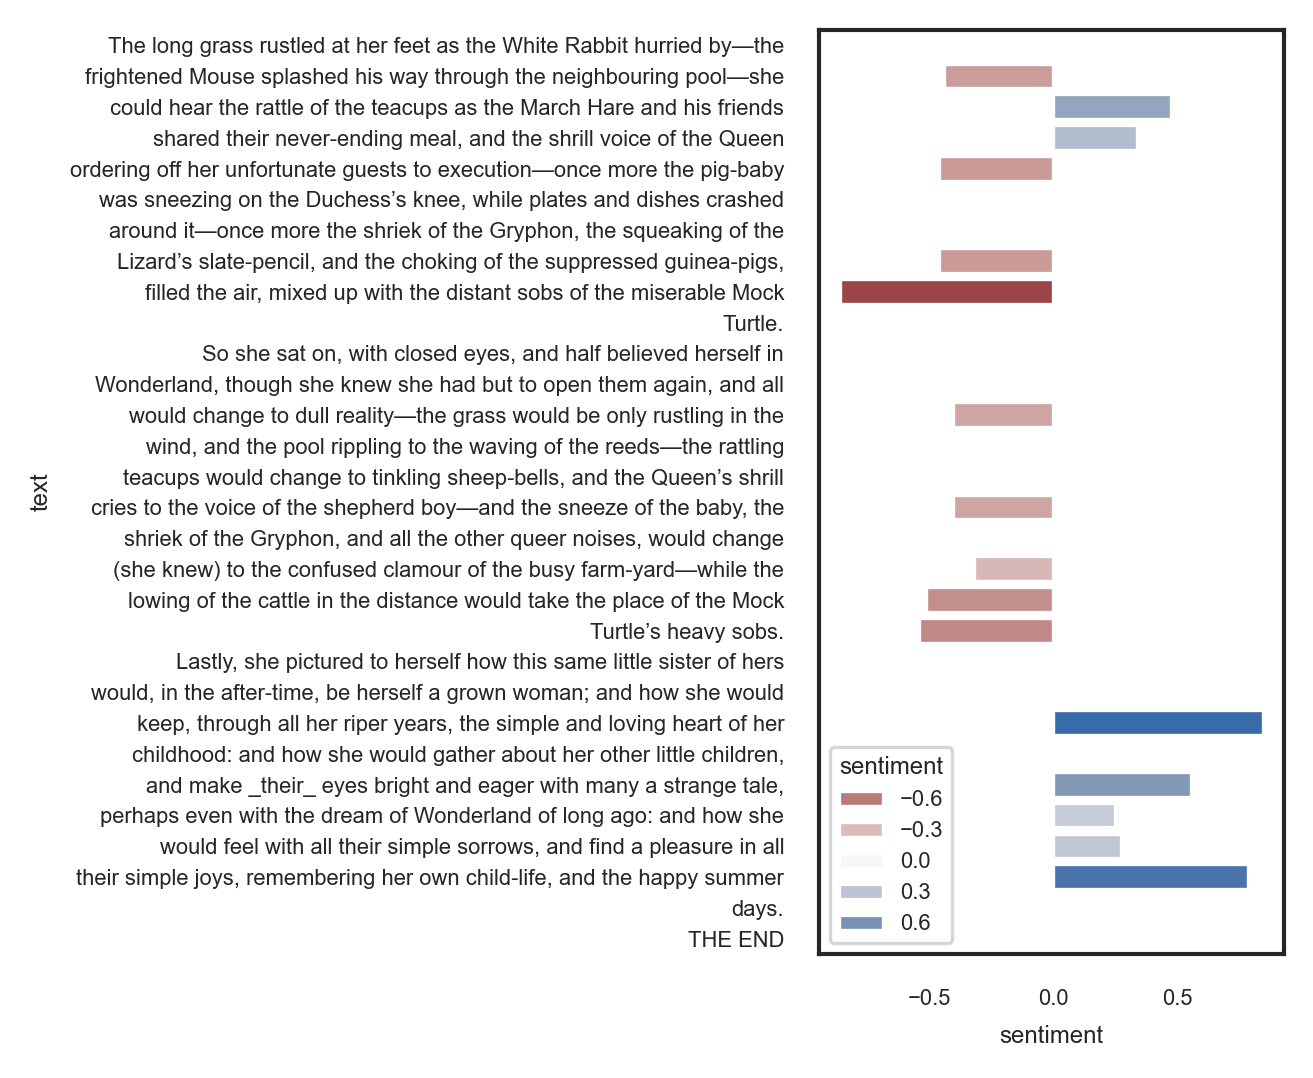

In [13]:
plt.figure(figsize=(2,4), dpi=300)
sns.barplot(data=alice_df[-30:], x='sentiment', y='text',hue='sentiment', palette=sns.color_palette("vlag_r", as_cmap=True))
# plt.axis('off')